<a href="https://colab.research.google.com/github/valerio-unifei/ecom01/blob/main/ECOM01-DS01-Extra%C3%A7%C3%A3o_de_Dados_com_L%C3%B3gica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset do Google Colab - California Housing Prices 1974

## Lendo Datasets (Base de Dados)

In [ ]:
import pandas as pd

california_housing = pd.read_csv('sample_data/california_housing_train.csv')
california_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


### Treinando Aprendizado de Máquina para Determinar Critério de Preço

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(criterion='squared_error',max_depth=3,max_features='auto')

X = california_housing[california_housing.columns[:-1]].values
y = california_housing[california_housing.columns[-1]].values

clf.fit(X, y)

clf.score(X,y)

0.5005506577654688

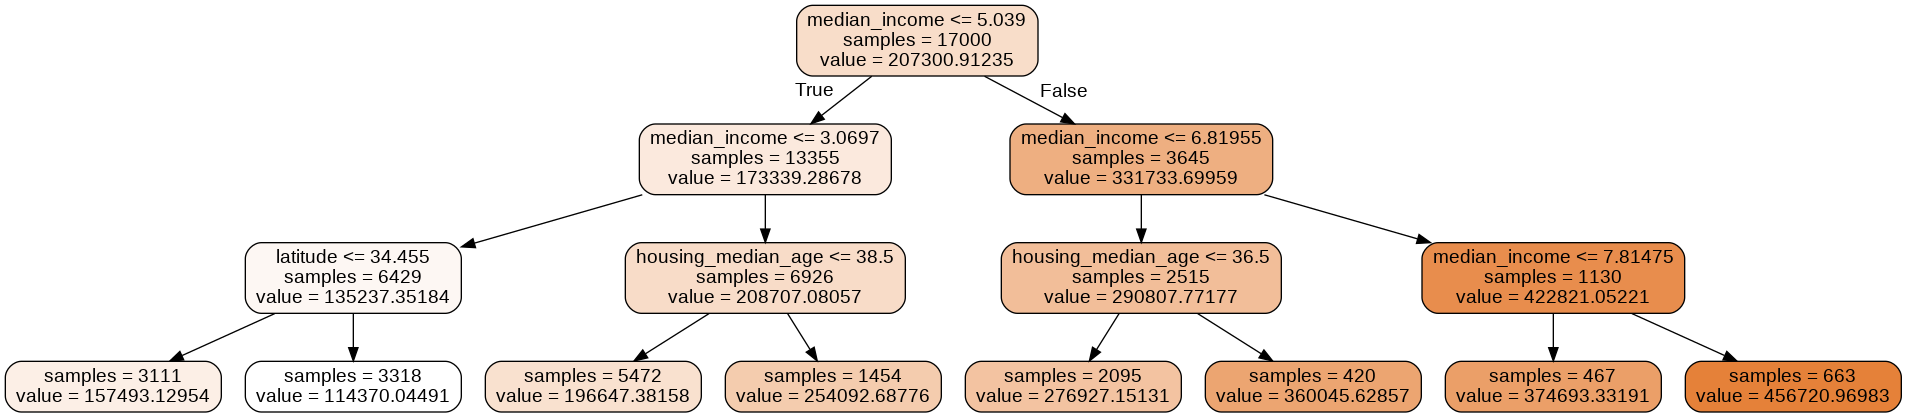

In [ ]:
import graphviz 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=california_housing.columns[:-1],
                     filled=True, rounded=True, impurity=False, 
                     special_characters=False, precision=5)  
graph = graphviz.Source(dot_data,format='png')  
graph.render('arvore')
Image(filename='arvore.png') 

# Selecionado Dados por Operadores Lógicos

Variáveis Lógicas - formulas atômicas

In [ ]:
r0 = (california_housing['median_income'] <= 5.039)
r1 = (california_housing['median_income'] <= 3.07)
r2 = (california_housing['median_income'] <= 6.81955)
r4 = (california_housing['latitude'] <= 34.455)
r5 = (california_housing['housing_median_age'] <= 38.5)
r6 = (california_housing['housing_median_age'] <= 36.5)
r7 = (california_housing['median_income'] <= 7.81475)

In [ ]:
ch = california_housing[ ~r0 & ~r2 & r7]
for col in ch.columns:
  print(col, '=',ch[col].mean() )

longitude = -119.6218201284796
latitude = 35.37995717344753
housing_median_age = 24.916488222698074
total_rooms = 3484.7130620985013
total_bedrooms = 514.6531049250535
population = 1389.2612419700215
households = 484.63169164882225
median_income = 7.278135760171306
median_house_value = 374693.3319057816


In [ ]:
~r1 | r1

0        True
1        True
2        True
3        True
4        True
         ... 
16995    True
16996    True
16997    True
16998    True
16999    True
Name: median_income, Length: 17000, dtype: bool

Operadores binários (Bitwise) do Python

https://docs.python.org/3/reference/expressions.html#operator-precedence

*   ~ : negação
*   & : e
*   | : ou
*   ^ : ou-exclusivo

In [ ]:
california_housing[ ~r0 & r2 & r6 ]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
32,-115.39,32.76,16.0,1136.0,196.0,481.0,185.0,6.2558,146300.0
69,-115.55,32.98,33.0,2266.0,365.0,952.0,360.0,5.4349,143000.0
92,-115.57,32.78,20.0,1534.0,235.0,871.0,222.0,6.2715,97200.0
98,-115.58,32.78,5.0,2494.0,414.0,1416.0,421.0,5.7843,110100.0
100,-115.59,32.79,8.0,2183.0,307.0,1000.0,287.0,6.3814,159900.0
...,...,...,...,...,...,...,...,...,...
16735,-122.89,38.42,28.0,2388.0,437.0,1015.0,381.0,5.1512,268300.0
16737,-122.89,38.38,16.0,2017.0,369.0,931.0,336.0,5.7664,267500.0
16762,-122.94,38.57,33.0,1530.0,266.0,728.0,250.0,5.1005,266700.0
16776,-123.00,38.33,8.0,3223.0,637.0,851.0,418.0,5.6445,364800.0


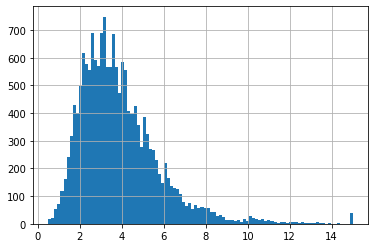

In [ ]:
california_housing['median_income'].hist(bins=100)

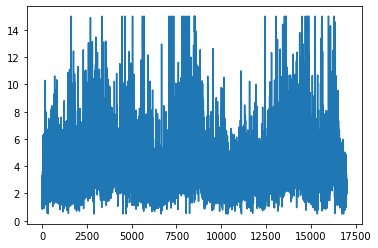

In [ ]:
california_housing['median_income'].plot()

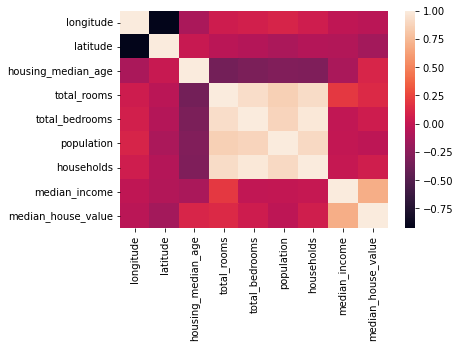

In [ ]:
import seaborn as sns

sns.heatmap(california_housing.corr())